<a href="https://colab.research.google.com/github/LautaroAguila/ProyectoCancelacionHoteles/blob/main/Proyecto%20Hoteles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Como podemos anticipar la cancelacion de una reserva en hoteles?



##Introduccion

**Contexto empresarial.** Los hoteles de las grandes cadenas tienen reservaciones toodos los dias, pero tambien tienen cancelaciones. Y quieren saber si pueden identificar los perfiles de las reservaciones que se cancelan, cualquiera sea la razon.
En este nuevo proyecto, donde se recopilaron muchos datos de hoteles, mediante visualizaciones que ayuden a identificar patrones, vamos a intentar encontrar dichos perfiles.

**Algunas preguntas que nos hacemos.**

1. ¿Que se cancela mas?¿Reservas semanales o de fines de semana?
2. ¿Suelen cancelar mas las familias con niños?¿O los adultos sin hijos?
3. ¿Los tiempos de espera son un factor importante para saber si cancelaran o no?
4. ¿Cual es el mes en el que se cancelan mas reservas?
5. ¿Cancelan mas las que contratan servicios (almuerzo, desayuno o cena), o los que no contratan ningun servicio?

### Carga de datos


In [57]:
import pandas as pd
import seaborn as sns

In [58]:
from google.colab import drive
import os
drive.mount("/content/gdirve")

Drive already mounted at /content/gdirve; to attempt to forcibly remount, call drive.mount("/content/gdirve", force_remount=True).


In [59]:
path = "/content/gdirve/MyDrive/DATA Coder/"

In [60]:
df_1 = pd.read_csv(path +'booking.csv', encoding =('ISO-8859-1'),low_memory =False)
df_1

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [61]:
df_2 = pd.read_csv(path +'hotel_bookings.csv', encoding =('ISO-8859-1'),low_memory =False)
df_2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Exploracion de los datos.

In [62]:
import numpy as np

In [63]:
# columnas del dataframe
df_1.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

Las columnas que usaremos principalmente son:

*   number of adults, de tipo numerica, es la cantidad de adultos por reservacion.
*   number of children, de tipo numerica, es la cantidad de adultos por reservacion.
*   number of weekend nights, de tipo numerica, es la cantidad de noches de fin de semana por reservacion.
*   number of week nights, de tipo numerica, es la cantidad de noches de la semana por reservacion.
*   lead time, de tipo numerica, es el timepo de espera que tuvo un cliente para su reservacion.
*   date of reservation, de tipo fecha, el dia en que realizaron la reserva.
*   booking status, de tipo categorica, nos dice si la reserva fue cancelada o no.
La utima columna para un trabajo mas facil cambiaremos sus dos opciones categoricas por numericas, es decir, pasaremos de ver canceled o not_canceled, para ver 1 y 0 respectivamente.



In [64]:
df_1 = df_1.rename(columns={'booking status':'is_canceled'})

In [65]:
df_1['is_canceled'] = df_1['is_canceled'].replace({'Not_Canceled' : 0, 'Canceled' : 1})

In [66]:
df_1['P-C'].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [67]:
df_1['P-not-C'].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [68]:
#Con el codigo anteriro demostramos que la gran mayoria no cunata el servicio P-C ni P-not-C
#Por lo tanton eliminaremos ambas columnas por que no aportan mucha informacion
df_1 = df_1.drop(columns=["P-C","P-not-C"])

In [69]:
df_1

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation,is_canceled
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,10/2/2015,0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,11/6/2018,0
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,2/28/2018,1
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,5/20/2017,1
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,4/11/2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,115.00,1,9/13/2018,1
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,107.55,1,10/15/2017,0
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,105.61,1,12/26/2018,0
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,96.90,1,7/6/2018,0


In [70]:
df_1.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,average price,special requests,is_canceled
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,103.421636,0.619733,0.327656
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,35.086469,0.786262,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,540.000000,5.000000,1.000000


In [71]:
# transformando objeto a datetime
# otro forma para convertir pd.to_datetime
df_1['date of reservation'] = pd.to_datetime(df_1['date of reservation'])

ValueError: time data "2018-2-29" doesn't match format "%m/%d/%Y", at position 495. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [73]:
#Para solucionar el problema anterior. Busco que que es lo que causa problema
df_1['date of reservation'].head(2630)

0       10/2/2015
1       11/6/2018
2       2/28/2018
3       5/20/2017
4       4/11/2018
          ...    
2625    4/12/2018
2626    2018-2-29
2627    7/18/2017
2628    5/21/2018
2629    9/11/2017
Name: date of reservation, Length: 2630, dtype: object

In [74]:
#Y lo cambio por algo que me permita hacer el cambio de tipo, de object a datetime
df_1['date of reservation'] = df_1['date of reservation'].replace({"2018-2-29" : "2/28/2018"})


In [75]:
# transformando objeto a datetime
df_1['date of reservation'] = pd.to_datetime(df_1['date of reservation'])

In [76]:
df_1['date of reservation'].head(2630)

0      2015-10-02
1      2018-11-06
2      2018-02-28
3      2017-05-20
4      2018-04-11
          ...    
2625   2018-04-12
2626   2018-02-28
2627   2017-07-18
2628   2018-05-21
2629   2017-09-11
Name: date of reservation, Length: 2630, dtype: datetime64[ns]

### Trabajo con nulos

En esta seccion vamos a ver si nuestras columnas tienen elementos nulos, y cambiarlos o en su defecto eliminarlos.

In [77]:
display(df_1.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
average price               0
special requests            0
date of reservation         0
is_canceled                 0
dtype: int64

No encontre ningun valor nulo para trabajar.

## Graficos

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

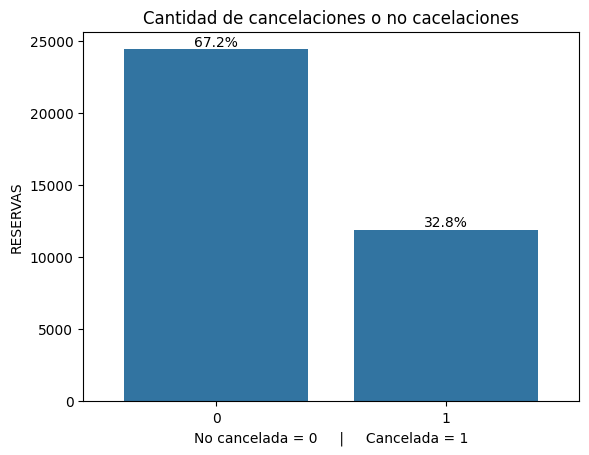

In [79]:
# Gráfico de barra countplot
ax = sns.countplot(data=df_1, x="is_canceled") #  axes-level
ax.set_title("Cantidad de cancelaciones o no cacelaciones")
ax.set_ylabel("RESERVAS")
ax.set_xlabel("No cancelada = 0     |     Cancelada = 1" )
# Para ver porcentaje
# Cantidad total
total = df_1['is_canceled'].count()
# anotar las barras con fmt de matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
# # agrega espacio al final de la barra para las etiquetas
ax.margins(x=0.1)

Con este grafico podemos ver claramente que, mas del 32% de las reservaciones de los hoteles son canceladas. Un numero suficientemete alto para querer identificar que perfiles suelen cancelar mas.

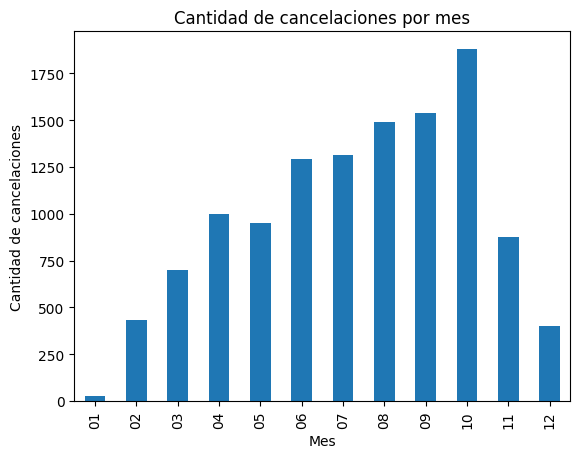

In [80]:
#De esta manera sabremos cuantas cancelaciones hay por mes y podremos grficarlo
df_1['mes'] = df_1['date of reservation'].dt.strftime('%m')
conteo_canceled_0_por_mes = df_1[df_1['is_canceled'] == 1].groupby('mes').size()
# Crear un gráfico de barras
conteo_canceled_0_por_mes.plot(kind='bar')
# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de cancelaciones')
# Mostrar el gráfico
plt.show()

Con este grafico podemos ver a simple vista que en el mes de Octubre las cancelaciones de las reservas son mas frecuentes.

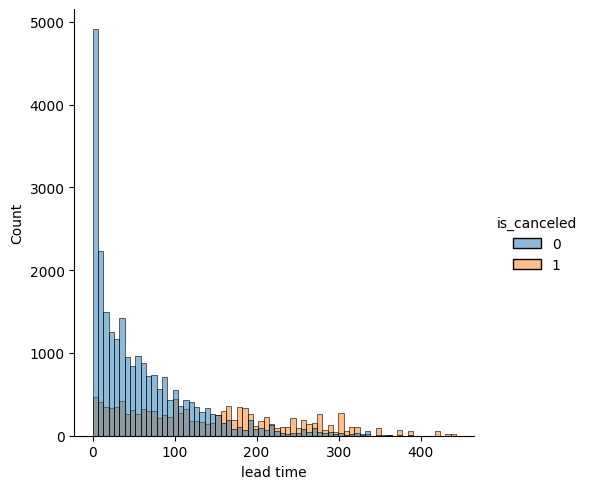

In [81]:
sns.displot(df_1, x = "lead time", kind ="hist" , hue ='is_canceled')

Con este grfico podemos ver a simple vista que cuanto mas tiempo de espera(lead time), mas cancelaciones hay (sabiendo que cancelado es 1 y no cancelado es 0).

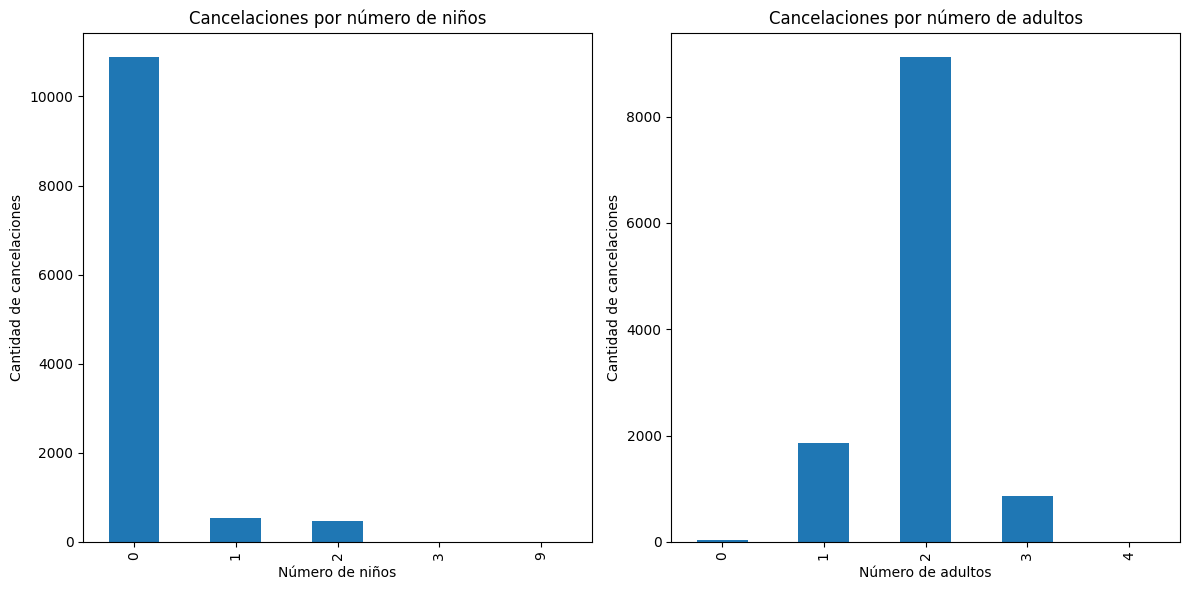

In [82]:
# Supongamos que ya tienes un DataFrame df con tus datos

# Calcular el número de cancelaciones por número de niños
cancelaciones_por_ninos = df_1[df_1['is_canceled'] == 1].groupby('number of children').size()

# Calcular el número de cancelaciones por número de adultos
cancelaciones_por_adultos = df_1[df_1['is_canceled'] == 1].groupby('number of adults').size()

# Crear una figura y ejes para los dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el primer gráfico (cancelaciones por número de niños)
cancelaciones_por_ninos.plot(kind='bar', ax=axs[0])
axs[0].set_title('Cancelaciones por número de niños')
axs[0].set_xlabel('Número de niños')
axs[0].set_ylabel('Cantidad de cancelaciones')

# Graficar el segundo gráfico (cancelaciones por número de adultos)
cancelaciones_por_adultos.plot(kind='bar', ax=axs[1])
axs[1].set_title('Cancelaciones por número de adultos')
axs[1].set_xlabel('Número de adultos')
axs[1].set_ylabel('Cantidad de cancelaciones')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Con estos dos graficos, podemos observar que hay mas cancelaciones cuando van adultos que cuando van niños.

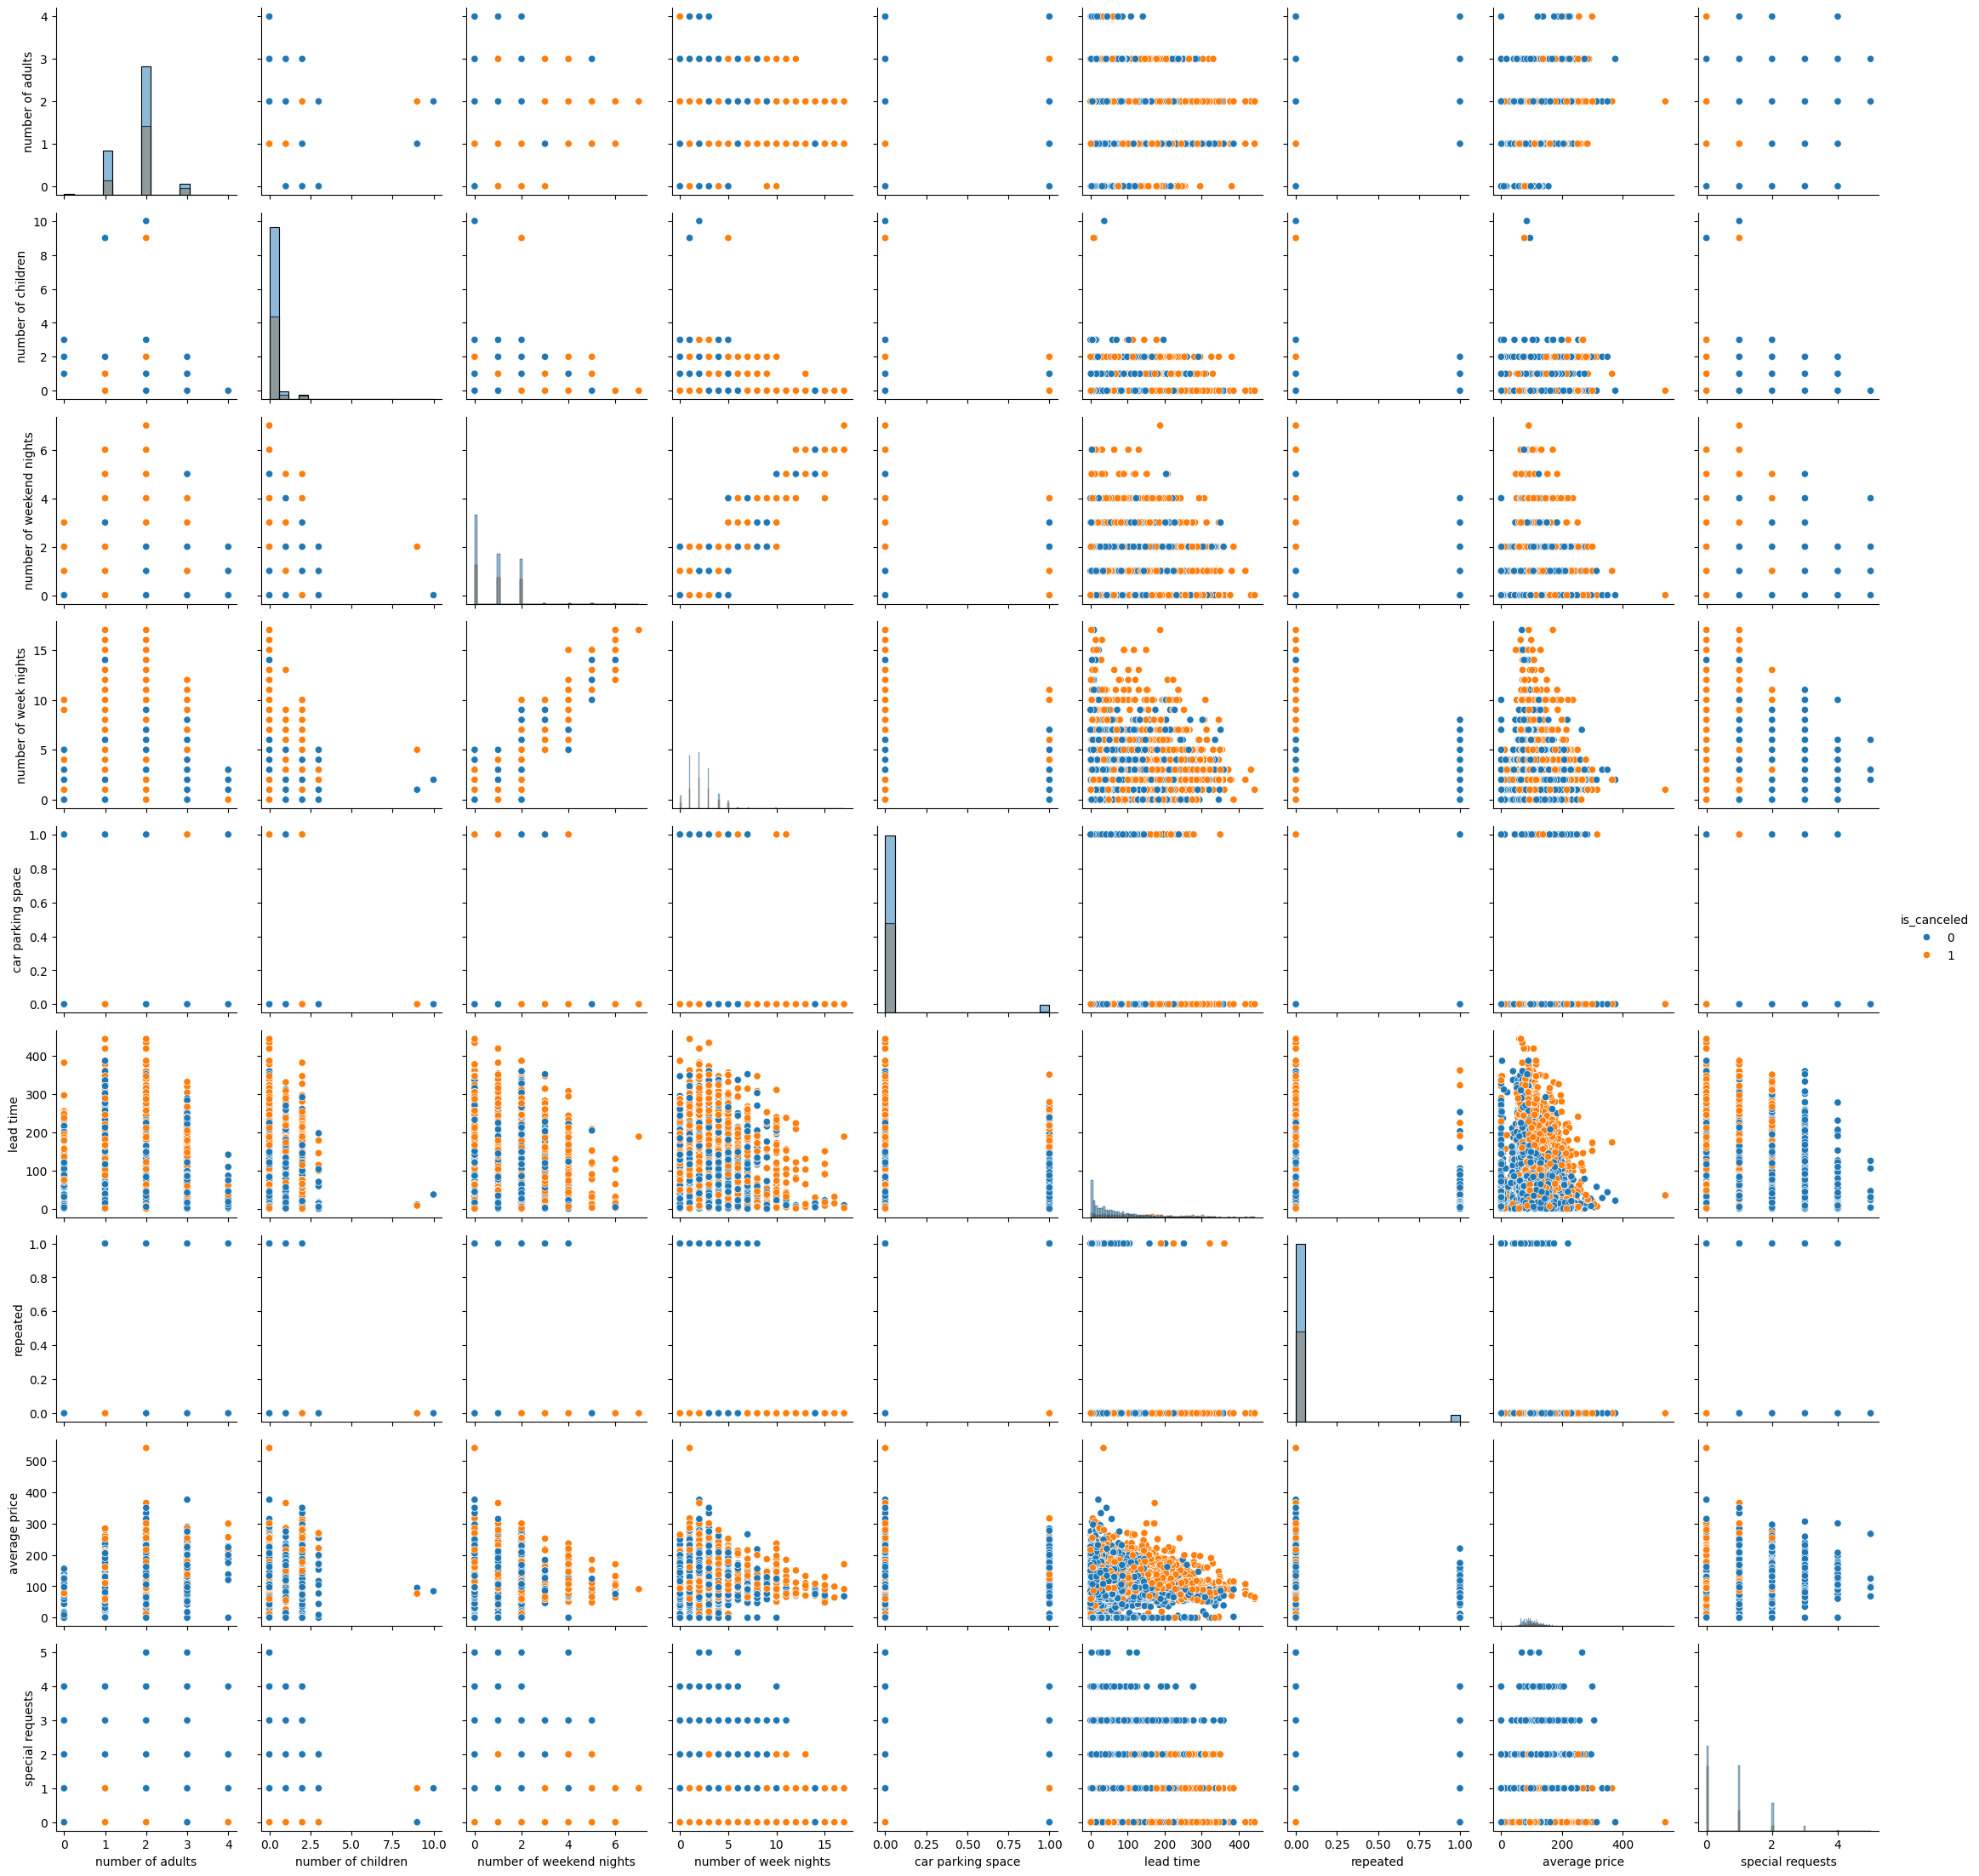

In [83]:
#Lo use para ver la variedad de graficos.
g = sns.PairGrid(df_1, hue="is_canceled")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()